<a href="https://colab.research.google.com/github/tocom242242/aifx_blog_codes/blob/master/datasets/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(f"train_size:{len(train_images)}, test_size:{len(test_images)}")

train_size:50000, test_size:10000


In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
unique_labels = np.unique(train_labels)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
for idx, name in zip(unique_labels, class_names):
    print(f"{idx}:{name}")

0:airplane
1:automobile
2:bird
3:cat
4:deer
5:dog
6:frog
7:horse
8:ship
9:truck


<BarContainer object of 10 artists>

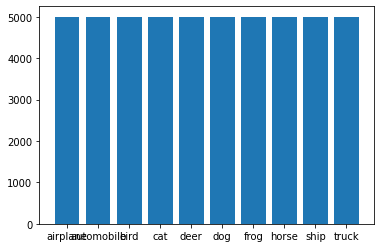

In [6]:
# 各データの個数
y = np.bincount(train_labels.reshape(len(train_labels)))
plt.bar(x=class_names, height=y)

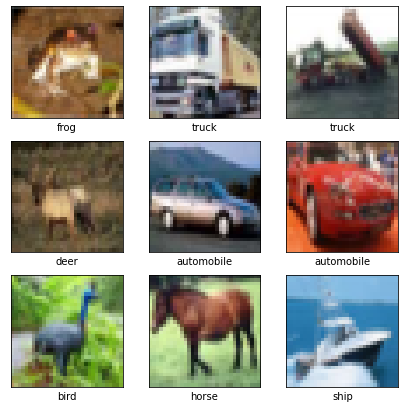

In [13]:

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 13s 4ms/step - loss: 1.7648 - accuracy: 0.3528 - val_loss: 1.2800 - val_accuracy: 0.5377
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1937 - accuracy: 0.5755 - val_loss: 1.1001 - val_accuracy: 0.6118
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0292 - accuracy: 0.6393 - val_loss: 1.0231 - val_accuracy: 0.6380
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9266 - accuracy: 0.6736 - val_loss: 0.9783 - val_accuracy: 0.6603
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8384 - accuracy: 0.7084 - val_loss: 0.9807 - val_accuracy: 0.6539
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7862 - accuracy: 0.7246 - val_loss: 0.8845 - val_accuracy: 0.6969
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7334 - accuracy: 0.7418 - val_loss: 0.8909 - val_a

KeyboardInterrupt: ignored

In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)